Integrantes:


*   Imanol Mendoza Saenz de Buruaga
*    Luis Enrique Villalon Pineda

In [43]:
import numpy as np

# Función de distancia Euclidiana
def dist_euclidiana(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Función de distancia Manhattan
def dist_manhattan(a, b, ax=1):
    return np.sum(np.abs(a - b), axis=ax)

# Función de distancia Coseno
def dist_cosine(a, b, ax=1):
    dot_product = np.sum(a * b, axis=ax)
    norm_a = np.linalg.norm(a, axis=ax)
    norm_b = np.linalg.norm(b, axis=ax)
    return 1 - (dot_product / (norm_a * norm_b))

# Función de K-Means
def kmeans(data, k, max_iters=100, distancia='euclidiana'):
    # Inicialización aleatoria de los centroides seleccionando k puntos al azar del dataset
    C = data[np.random.choice(data.shape[0], k, replace=False)]

    # Inicializar los clusters y la matriz de distancias
    clusters = np.zeros(len(data))

    # Seleccionar la función de distancia
    if distancia == 'euclidiana':
        dist = dist_euclidiana
    elif distancia == 'manhattan':
        dist = dist_manhattan
    elif distancia == 'cosine':
        dist = dist_cosine
    else:
        raise ValueError("Distancia no válida. Elige 'euclidiana', 'manhattan' o 'cosine'.")

    for _ in range(max_iters):
        # Actualizar distancias y asignar clusters
        for i in range(len(data)):
            # Calcular distancias de cada punto a los centroides y asignar al cluster más cercano
            distance = dist(data[i], C)
            clusters[i] = np.argmin(distance)  # Asignar el cluster basado en la distancia mínima

        # Guardar los centroides actuales para comparar si convergen
        C_old = np.copy(C)

        # Recalcular los centroides
        for i in range(k):
            points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
            if len(points) > 0:  # Si hay puntos en el cluster, recalcular el centroide
                C[i] = np.mean(points, axis=0)

        # Verificar si los centroides no cambian, entonces el algoritmo ha convergido
        if np.all(C == C_old):
            break

    return clusters, C




## Ejemplo 1

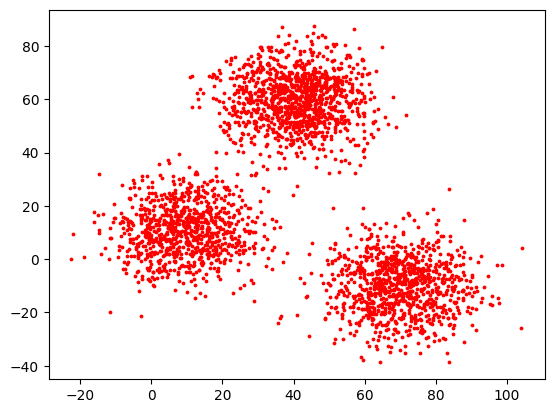

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
# conjunto de datos
url="https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/refs/heads/master/csv/cluster/xclara.csv"
data = pd.read_csv(url)
data.head()

v1, v2 = data['V1'].values, data['V2'].values
plt.scatter(v1, v2, c='r', s=3)

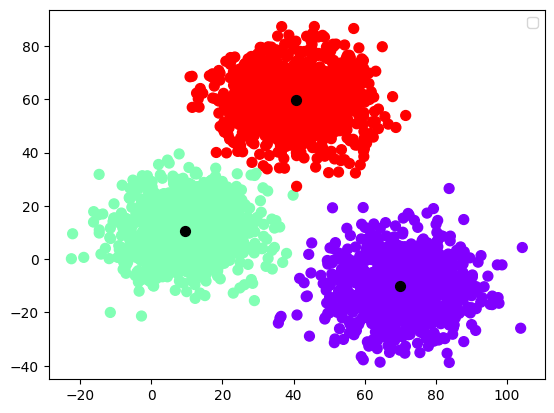

In [26]:
# Convertir las columnas 'V1' y 'V2' a un array NumPy
v1, v2 = data['V1'].values, data['V2'].values
data_array = np.column_stack((v1, v2))  # Combinar v1 y v2 en un array bidimensional

clusters, centroids = kmeans(data_array, 3, distancia='euclidiana')

# Graficar los resultados
plt.scatter(v1, v2, c=clusters, cmap='rainbow', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='o', s=50)
plt.legend()
plt.show()


In [39]:
 import numpy as np
 import pandas as pd
 from matplotlib import pyplot as plt
 plt.rcParams['figure.figsize'] = (10, 10)
 plt.style.use('ggplot')

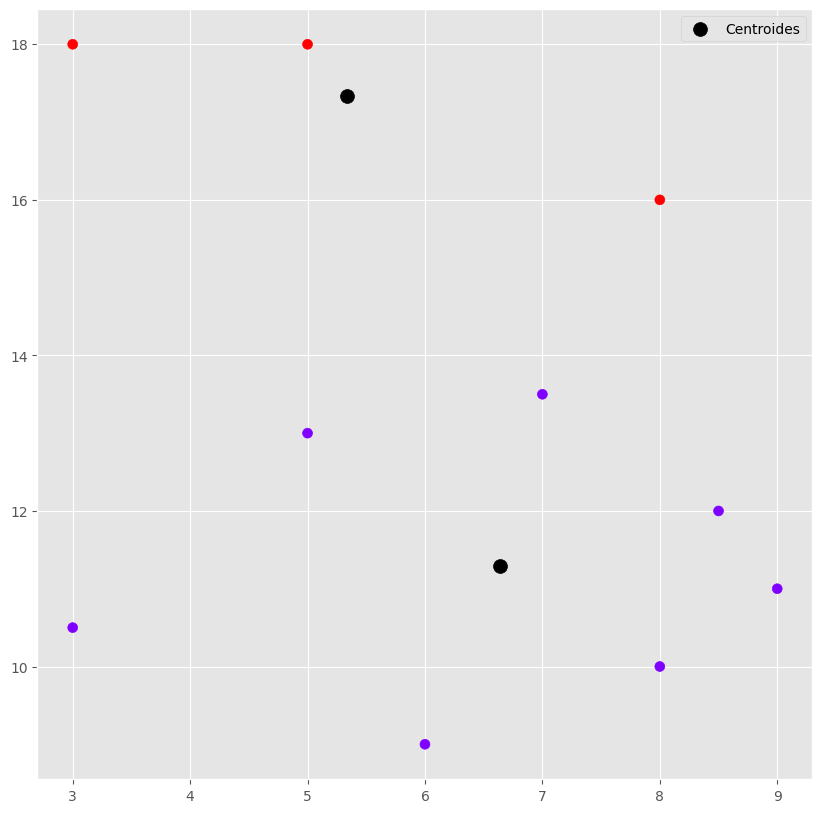

In [40]:
data = np.array([[8,10],[3,10.5],[7,13.5],[5,18],[5,13],[6,9],[9,11],[3,18],[8.5,12],[8,16]])

clusters, centroids = kmeans(data, 2, distancia='euclidiana')

# Graficar los resultados
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='rainbow', s=50)  # Graficar los puntos coloreados por clusters
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='o', s=100, label='Centroides')  # Graficar los centroides
plt.legend()
plt.show()


In [41]:
import numpy as np

def k_modes(data, modes=None, k=2, max_iters=100, métrica='single'):

    # Si no se pasan las modas iniciales, inicializar aleatoriamente
    if modes is None:
        np.random.seed(0)  # Fijar la semilla para reproducibilidad
        modes = data[np.random.choice(data.shape[0], k, replace=False)]

    # Inicializar los clusters
    clusters = np.zeros(data.shape[0])

    # Iterar hasta un máximo número de iteraciones
    for _ in range(max_iters):
        distances = []

        # Asignar cada objeto al cluster con la moda más cercana
        for i, object in enumerate(data):
            dist = [sum(object != mode) for mode in modes]  # Número de atributos diferentes
            distances.append(dist)

            # Aplicar la métrica seleccionada
            if métrica == 'single':
                clusters[i] = np.argmin(dist)  # Menor disimilitud (single-linkage)
            elif métrica == 'complete':
                clusters[i] = np.argmax(dist)  # Mayor disimilitud (complete-linkage)
            elif métrica == 'average':
                clusters[i] = np.argmin([np.mean(dist)])  # Promedio de disimilitudes (average-linkage)

        # Guardar las modas antiguas para comparar si convergen
        modes_old = np.copy(modes)

        # Actualizar las modas (similar a recalcular los centroides)
        for i in range(len(modes)):
            # Seleccionar los puntos que pertenecen al cluster i
            points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])

            if len(points) > 0:  # Si el cluster tiene puntos asignados
                for h in range(modes.shape[1]):  # Para cada característica (columna)
                    # Encontrar los valores más comunes (moda) en la característica h
                    vals, counts = np.unique(points[:,h], return_counts=True)
                    modes[i,h] = vals[np.argmax(counts)]  # Actualizar la moda con el valor más común

        # Verificar si las modas no cambian, lo que significa que el algoritmo ha convergido
        if np.all(modes == modes_old):
            break

    return clusters, modes




#Ejemplo 1

In [42]:

data = np.array([['x', 'y', 'z'],
                 ['y', 'z', 'x'],
                 ['z', 'x', 'x'],
                 ['y', 'z', 'z'],
                 ['x', 'z', 'y'],
                 ['z', 'y', 'x'],
                 ['x', 'x', 'y'],
                 ['z', 'y', 'x']])

# Ejecutar K-Modes sin proporcionar modas iniciales, especificando el número de clusters

clusters, updated_modes = k_modes(data, k=2)

print("Clusters asignados:", clusters)
print("Modas actualizadas:", updated_modes)

Clusters asignados: [0. 0. 1. 0. 0. 1. 0. 1.]
Modas actualizadas: [['x' 'z' 'y']
 ['z' 'y' 'x']]


# Agrupamiento Aglomerativo 

## Ejemplo 1 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = 'https://bit.ly/2COHM14'
data = pd.read_csv(url)
data.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


In [4]:
# Preprocesamiento,Normalizacion (para no sesgar los datos)
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled,columns= data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


### Distancias

In [10]:
from sklearn.cluster import AgglomerativeClustering

# Agrupamiento usando la distancia Manhattan
clustering_manhattan = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage='average')
y_hat_man = clustering_manhattan.fit_predict(data_scaled)
# Agrupamiento usando la distancia Cosine
clustering_cosine = AgglomerativeClustering(n_clusters=3, metric='cosine', linkage='average')
y_hat_cos = clustering_cosine.fit_predict(data_scaled)

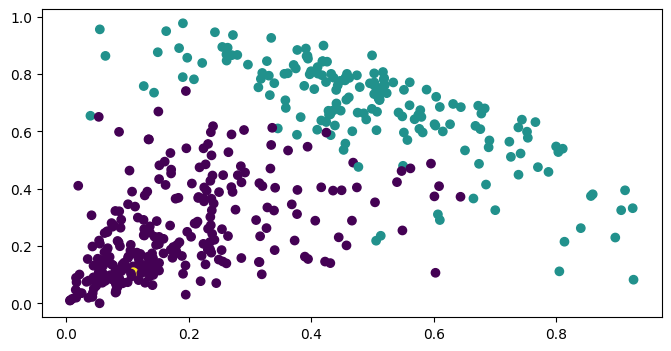

In [12]:
# Manhattan
plt.figure(figsize=(8,4))
plt.scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_man)
plt.show()

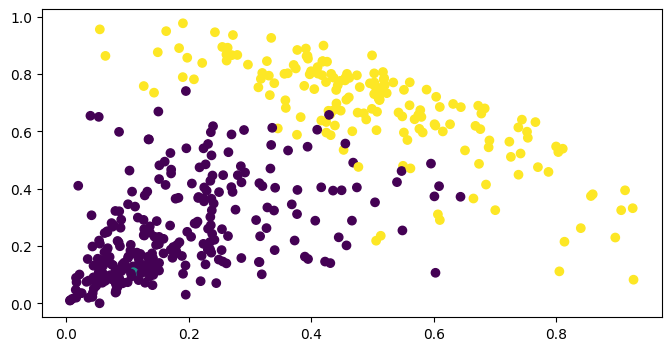

In [13]:
# Cosine
plt.figure(figsize=(8,4))
plt.scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_cos)
plt.show()

### Tipos de enlazamiento

Usaremos la distancia euclidiana como vimos en clase 

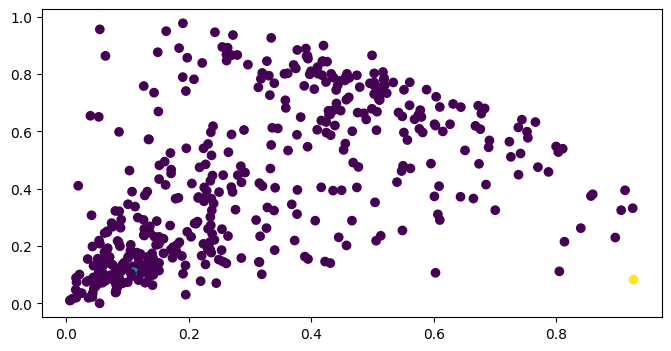

In [43]:
# Enlazamiento single (mínima distancia entre puntos de distintos clusters)
clustering_single = AgglomerativeClustering(n_clusters=3, linkage='single', metric='euclidean')
y_hat_sin = clustering_single.fit_predict(data_scaled)
plt.figure(figsize=(8,4))
plt.scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_sin)
plt.show()

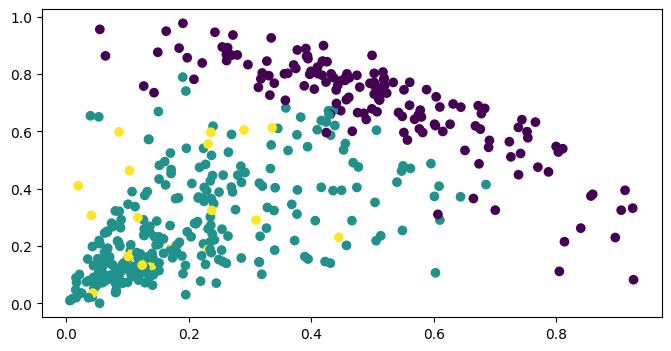

In [44]:
# Enlazamiento complete (máxima distancia entre puntos de distintos clusters)
clustering_complete = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='euclidean')
y_hat_com = clustering_complete.fit_predict(data_scaled)
plt.figure(figsize=(8,4))
plt.scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_com)
plt.show()

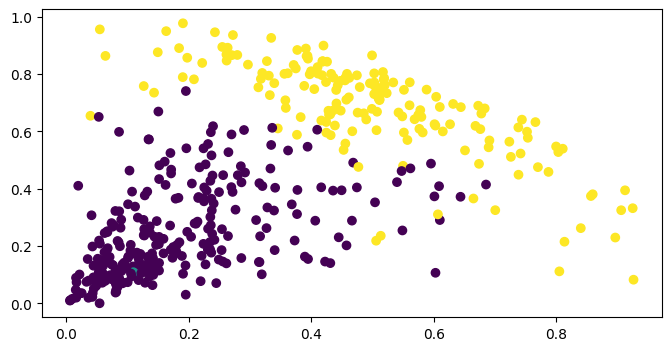

In [45]:
# Enlazamiento average (distancia promedio entre puntos de distintos clusters)
clustering_average = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
y_hat_avg = clustering_average.fit_predict(data_scaled)
plt.figure(figsize=(8,4))
plt.scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_avg)
plt.show()

## Ejemplo 2  

In [16]:
url = 'https://bit.ly/3TUeh37'
dataset = pd.read_csv(url)
dataset.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [20]:
from typing import ValuesView
# Columnas de intres
X_2= dataset.iloc[:,[3,4]].values

In [23]:
# Ejemplo de clase 
# 3 grupos
from sklearn.cluster import AgglomerativeClustering
ac_2 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hat_2 = ac_2.fit_predict(X_2)

### Distancias 

In [25]:
# Agrupamiento usando la distancia Manhattan
clustering_manhattan = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage='average')
y_hat_man_2 = clustering_manhattan.fit_predict(X_2)
# Agrupamiento usando la distancia Cosine
clustering_cosine = AgglomerativeClustering(n_clusters=3, metric='cosine', linkage='average')
y_hat_cos_2 = clustering_cosine.fit_predict(X_2)

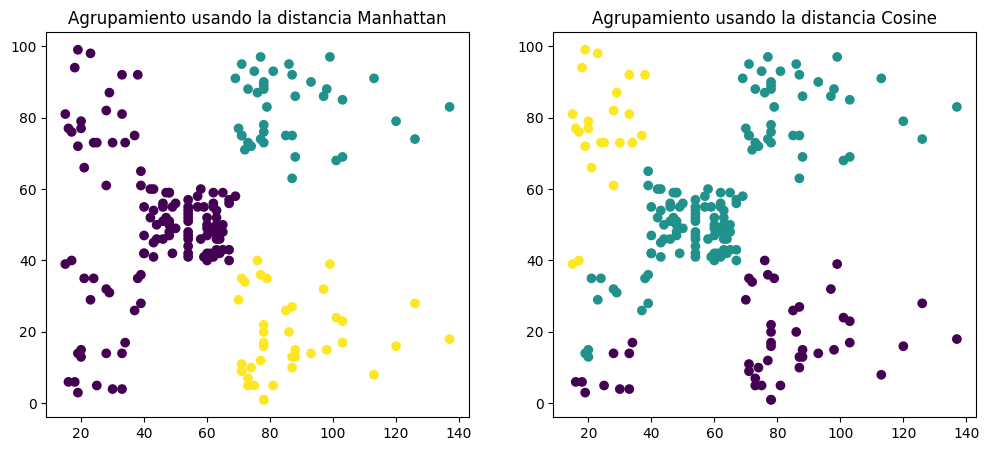

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_2[:, 0], X_2[:, 1], c=y_hat_man_2, cmap='viridis')
axs[0].set_title('Agrupamiento usando la distancia Manhattan')
axs[1].scatter(X_2[:, 0], X_2[:, 1], c=y_hat_cos_2, cmap='viridis')
axs[1].set_title('Agrupamiento usando la distancia Cosine')

plt.show()

### Tipos de enlazamiento 

Usaremos la distancia euclidiana como vimos en clase 

In [30]:
# Enlazamiento single (mínima distancia entre puntos de distintos clusters)
clustering_single_2 = AgglomerativeClustering(n_clusters=3, linkage='single', metric='euclidean')
y_hat_sin_2 = clustering_single_2.fit_predict(X_2)
# Enlazamiento complete (máxima distancia entre puntos de distintos clusters)
clustering_complete_2 = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='euclidean')
y_hat_com_2 = clustering_complete_2.fit_predict(X_2)
# Enlazamiento average (distancia promedio entre puntos de distintos clusters)
clustering_average_2 = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
y_hat_avg_2 = clustering_average_2.fit_predict(X_2)

Text(0.5, 1.0, 'Enlazamiento average')

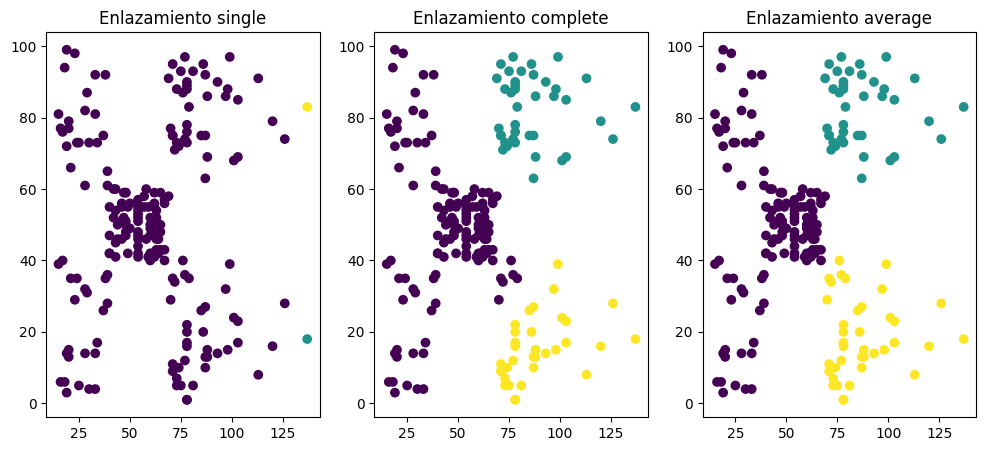

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
axs[0].scatter(X_2[:, 0], X_2[:, 1], c=y_hat_sin_2, cmap='viridis')
axs[0].set_title('Enlazamiento single')
axs[1].scatter(X_2[:, 0], X_2[:, 1], c=y_hat_com_2, cmap='viridis')
axs[1].set_title('Enlazamiento complete')
axs[2].scatter(X_2[:, 0], X_2[:, 1], c=y_hat_avg_2, cmap='viridis')
axs[2].set_title('Enlazamiento average')